# **Project 1**

In [ ]:
// Function to load data dynamically
async function loadCoralData() {
    // If you exported JSON file, you can fetch it:
    // try {
    //     const response = await fetch('../data/coral_reef_data.json');
    //     return await response.json();
    // } catch (error) {
    //     console.error('Could not load data file, using default data');
    //     return null;
    // }
    
    // For now, use the data from data.js if available
    return window.coralReefData || null;
}

// Initialize charts with real data
document.addEventListener('DOMContentLoaded', async function() {
    console.log('DOM loaded, initializing charts...');
    
    if (typeof Chart === 'undefined') {
        console.error('Chart.js not loaded');
        return;
    }
    
    // Load real data
    const realData = await loadCoralData();
    
    // Use real data if available, otherwise use sample data
    const timeSeriesData = realData ? {
        labels: realData.timeSeries.labels,
        datasets: [{
            label: 'Average Temperature (°C)',
            data: realData.timeSeries.data,
            borderColor: 'rgb(255, 99, 132)',
            backgroundColor: 'rgba(255, 99, 132, 0.1)',
            tension: 0.3,
            pointBackgroundColor: 'rgb(255, 99, 132)',
            pointBorderColor: '#fff',
            pointHoverBackgroundColor: '#fff',
            pointHoverBorderColor: 'rgb(255, 99, 132)'
        }]
    } : getDefaultTimeSeriesData();
    
    const northSouthData = realData ? {
        labels: realData.northSouth.labels,
        datasets: [{
            label: 'Northern Section',
            data: realData.northSouth.northData,
            borderColor: 'rgb(255, 99, 132)',
            backgroundColor: 'rgba(255, 99, 132, 0.1)',
            tension: 0.3
        }, {
            label: 'Southern Section',
            data: realData.northSouth.southData,
            borderColor: 'rgb(54, 162, 235)',
            backgroundColor: 'rgba(54, 162, 235, 0.1)',
            tension: 0.3
        }]
    } : getDefaultNorthSouthData();
    
    // Create charts with real data
    createTimeSeriesChart(timeSeriesData);
    createNorthSouthChart(northSouthData);
    createHeatmapChart(realData ? realData.heatmap.points : null);
});

function createTimeSeriesChart(data) {
    const timeCtx = document.getElementById('timeSeriesChart');
    if (timeCtx) {
        new Chart(timeCtx, {
            type: 'line',
            data: data,
            options: {
                responsive: true,
                maintainAspectRatio: false,
                plugins: {
                    title: {
                        display: true,
                        text: 'Yearly Average Hotspot Temperature (°C) in the Great Barrier Reef',
                        font: { size: 16 }
                    }
                },
                scales: {
                    y: {
                        beginAtZero: false,
                        title: { display: true, text: 'Temperature (°C)' }
                    },
                    x: {
                        title: { display: true, text: 'Time Period' }
                    }
                }
            }
        });
    }
}

function createNorthSouthChart(data) {
    const nsCtx = document.getElementById('northSouthChart');
    if (nsCtx) {
        new Chart(nsCtx, {
            type: 'line',
            data: data,
            options: {
                responsive: true,
                maintainAspectRatio: false,
                plugins: {
                    title: {
                        display: true,
                        text: 'Northern vs Southern Great Barrier Reef Temperatures',
                        font: { size: 16 }
                    }
                },
                scales: {
                    y: {
                        beginAtZero: false,
                        title: { display: true, text: 'Temperature (°C)' }
                    },
                    x: {
                        title: { display: true, text: 'Time Period' }
                    }
                }
            }
        });
    }
}

function createHeatmapChart(heatmapPoints) {
    const heatCtx = document.getElementById('heatmapChart');
    if (heatCtx) {
        const data = heatmapPoints || generateHeatmapData();
        
        new Chart(heatCtx, {
            type: 'scatter',
            data: {
                datasets: [{
                    label: 'Temperature Hotspots',
                    data: data,
                    backgroundColor: function(context) {
                        const point = context.raw;
                        const temp = point.temperature || 0;
                        if (temp > 1.5) return 'rgba(220, 20, 60, 0.8)';
                        if (temp > 1.0) return 'rgba(255, 69, 0, 0.8)';
                        if (temp > 0.5) return 'rgba(255, 140, 0, 0.8)';
                        if (temp > 0) return 'rgba(255, 215, 0, 0.8)';
                        return 'rgba(30, 144, 255, 0.6)';
                    },
                    pointRadius: function(context) {
                        const point = context.raw;
                        return Math.max(2, Math.abs(point.temperature || 0) * 2 + 1);
                    }
                }]
            },
            options: {
                responsive: true,
                maintainAspectRatio: false,
                plugins: {
                    title: {
                        display: true,
                        text: 'Coral Bleaching Hotspot Temperatures on the Great Barrier Reef',
                        font: { size: 16 }
                    },
                    tooltip: {
                        callbacks: {
                            label: function(context) {
                                const point = context.raw;
                                return [
                                    `Longitude: ${point.x.toFixed(2)}°`,
                                    `Latitude: ${point.y.toFixed(2)}°`,
                                    `Temperature: ${point.temperature.toFixed(2)}°C`
                                ];
                            }
                        }
                    }
                },
                scales: {
                    x: { title: { display: true, text: 'Longitude (°E)' } },
                    y: { title: { display: true, text: 'Latitude (°S)' } }
                }
            }
        });
    }
}

// Fallback functions for default data if real data isn't available
function getDefaultTimeSeriesData() {
    // Your existing sample data here
}

function getDefaultNorthSouthData() {
    // Your existing sample data here
}

## **1. Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google.colab import drive

## **2. Import Data Set**

The data set was collected using the website that is separated by time, lattitude, longitude, and grid variables that include pixel characteristics and classifications and that of temperature and bleaching hot spot.

When collecting this data, there was problems in collecting the average data as the data is found to be per 7 days so the data would skip exactly **7 days** from the previous entry thus it will only allow **one entry a week**. Due to the inability of having a fast computer or having the ability to hold onto several hundreds of gigs of memory, I lowered the measurement count to a weekly count.

The downsides to having a really good data set is that a significant amount of time to load the data as it was found to have around 16 million rows of data entries. Though the best thing that can come out of it is a good graph and good data set that shows very accurate numbers based on the source.

In [ ]:
#import data set
df = pd.read_csv('/content/noaacrwhotspotDaily_facd_b6c8_6265.csv', header=None, index_col=False, skiprows= 1)
df.columns = ['time (UTC)', 'latitude (degrees_north)', 'longitude (degrees_east)', 'hotspot (degree_C)']
print(df.head())

             time (UTC)  latitude (degrees_north)  longitude (degrees_east)  \
0  2020-04-08T12:00:00Z                   -20.525                   148.625   
1  2020-04-08T12:00:00Z                   -20.525                   148.675   
2  2020-04-08T12:00:00Z                   -20.525                   148.725   
3  2020-04-08T12:00:00Z                   -20.525                   148.775   
4  2020-04-08T12:00:00Z                   -20.525                   148.825   

   hotspot (degree_C)  
0                 NaN  
1               -0.82  
2               -0.81  
3               -0.79  
4               -0.75  


## **3. Clean Data Set**

The original data set has been made written in the following:
1.   time (UTC)
2.   latitude (degrees_north)
3.   longitude (degrees_east)
4.   hotspot (degree_C)

To simplify this, the labels were changed into the following in respective order:


1.   time
2.   latitude
3.   longitude
4.   hotspot (C)

The data is then averaged per day based on the entry's coordinates (longtitude, latitude) and its time period to make sure that there is a singular entry per coordinate daily entry.

In [ ]:
# Rename columns here in order to make sense of the headers
df.rename(columns={
    'time (UTC)': 'time',
    'latitude (degrees_north)': 'latitude',
    'longitude (degrees_east)': 'longitude',
    'hotspot (degree_C)': 'hotspot (C)'
}, inplace=True)

# Convert the time stamps into date time then into date
df['time'] = pd.to_datetime(df['time']).dt.date

# Filter out the NA sections found in Hot Spot
df.dropna(subset=['hotspot (C)'], inplace=True)

# Printed Statement of Changes
print("Filtered Data")
print(df.info())

print("\nFirst 5 entries")
print(df.head())

# Find average based on the time and coordinates per day
daily_average = df.groupby(['time', 'latitude', 'longitude'])['hotspot (C)'].mean().reset_index()

# Print Statement of final filtering changes
print("Final filtered data")
print(df.info())

print("\nFirst 5 entries")
print(df.head())


Filtered Data
<class 'pandas.core.frame.DataFrame'>
Index: 10639053 entries, 1 to 15039948
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   time         object 
 1   latitude     float64
 2   longitude    float64
 3   hotspot (C)  float64
dtypes: float64(3), object(1)
memory usage: 405.8+ MB
None

First 5 entries
         time  latitude  longitude  hotspot (C)
1  2020-04-08   -20.525    148.675        -0.82
2  2020-04-08   -20.525    148.725        -0.81
3  2020-04-08   -20.525    148.775        -0.79
4  2020-04-08   -20.525    148.825        -0.75
5  2020-04-08   -20.525    148.875        -0.71
Final filtered data
<class 'pandas.core.frame.DataFrame'>
Index: 10639053 entries, 1 to 15039948
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   time         object 
 1   latitude     float64
 2   longitude    float64
 3   hotspot (C)  float64
dtypes: float64(3), object(1)
memory usage: 405.8+ MB
None

First 5 entr

## **3.1 Saved Data for Dynamic Chart (Only do this if you want to save the data)**


In [ ]:
# Mount to Google Drive to save file
drive.mount('/content/drive')
df.to_csv('/content/drive/MyDrive/filtered_data.csv', index=False)

# Check if the file is in Google Drive
!ls /content/drive/MyDrive | grep filtered_data

# Remove the file so that it doesn't get changed while playing with the data
drive.flush_and_unmount()

Mounted at /content/drive
filtered_data.csv


## **4. Hotspot Map Visualization**

The data uses a scatterplot to map out the hotspots in the Great Barrier Reef. The data set uses the average temperature stated earlier with the longitude and latitude as well. A legend was made letting the audience know what they're seeing.

In terms of what you view below, the scale is relative to the thermal stress scale for coral. If positive, the general temperature of the waters is warm where 1 to 2 degrees correlates potential coral bleaching in the area. In contrast, if the values are 0 to -12 degrees, the waters are cooler.

Based on the data it seems that coral bleachings eems to be at the northern end of the Great Coral Reef

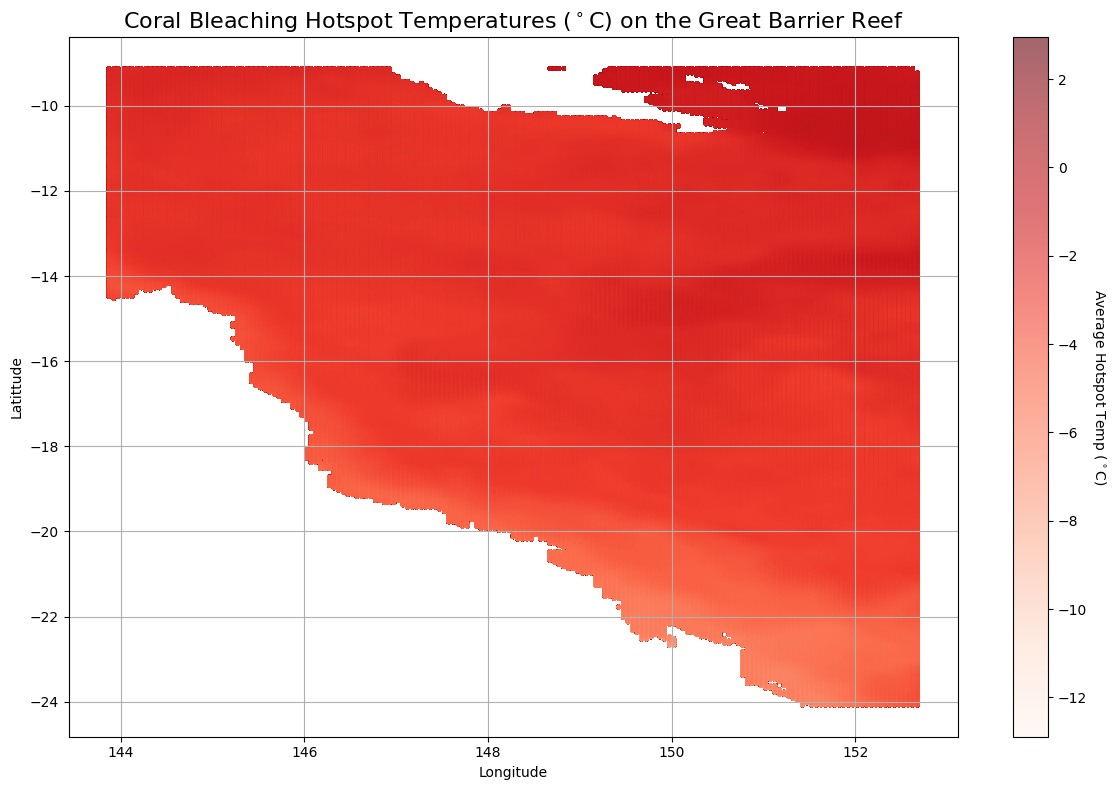

In [ ]:
# Create Map Visualization
plt.figure(figsize=(12, 8))
plt.scatter(
    daily_average['longitude'],
    daily_average['latitude'],
    c=daily_average['hotspot (C)'],
    cmap='Reds',
    s=5,
    alpha=0.6
)

# Legend
cbar = plt.colorbar()
cbar.set_label('Average Hotspot Temp ($^\\circ$C)', rotation=270, labelpad=15)

# Titles and Labels
plt.title('Coral Bleaching Hotspot Temperatures ($^\\circ$C) on the Great Barrier Reef', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latittude')
plt.grid(True)
plt.tight_layout()


## **5. Average Temperature Difference between Northern and Southern Frontiers (Bar Graph)**

This portion looks specifically to see if it can answer the question if the top portion of the great barrier reef has higher temperatures than that of the bottom portion.

The way to find if the area is near the top portion (northern section) of the great barrier reef is by finding the difference of 8.6 to 9.6 latitude and 23.6 and 24.6 latitude. This is due to the top and bottom portion (southern section) looking more specifically at the y-coordinate plane rather than the x.

When looking at the data, as shown in the heat map prior, one can see that the top portion of the great barrier reef is consistently warmer than that of the original thus causing a potential whereas the bottom portion have a huge fluctuation in temperature but due to the cooling period it allows the reef to recover on off seasons. Thus, due to the consistent warm waters, the top portion of the great barrier reef is distinguishable from the bottom portion due to this reading.

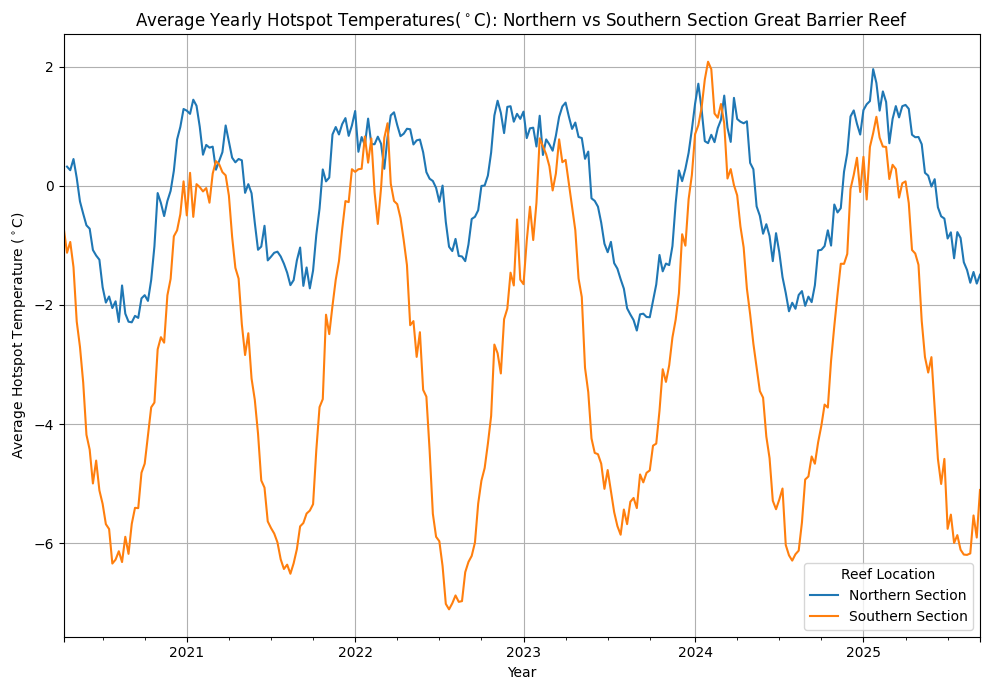

In [ ]:
# Set time as an index or else it would not work
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Define the north (top) and south (bottom) section of the reefs
top = df[(df['latitude'] >= -9.633) & (df['latitude'] <= -8.633)]
bottom = df[(df['latitude'] >= -24.6) & (df['latitude'] <= -23.6)]

# Find the average weekly temperatures of the reef
top_weekly_avg = top['hotspot (C)'].resample('W').mean()
bottom_weekly_avg = bottom['hotspot (C)'].resample('W').mean()

# Plot the average temperatures as two separate lines
fig, x = plt.subplots(figsize=(10,7))
top_weekly_avg.plot(x=x, label='Northern Section')
bottom_weekly_avg.plot(x=x, label='Southern Section')

# Labels and Title
plt.title('Average Yearly Hotspot Temperatures($^\\circ$C): Northern vs Southern Section Great Barrier Reef')
plt.xlabel('Year')
plt.ylabel('Average Hotspot Temperature ($^\\circ$C)')
plt.legend(title='Reef Location')
plt.grid(True)
plt.tight_layout()

# Plot
plt.show()

## **6. Temperature Difference Shown by Year (Line Graph)**

Looks at the temperature differences by overall average you can see the deeper impact that the southern section has on the height of the peaks of the data set and the low troughs. Looking at this overall it seems that there is a warm time period around January to April, as that time period is summer for Australia, which makes the data sound as the cold periods are around may to september which is their winter. The peak isn't as high as the northern section, but it does lead the audience to misinterpret the data as there isn't much coral bleaching but comparing this graph and the region map, you can see regions definitely have potential coral bleaching areas.

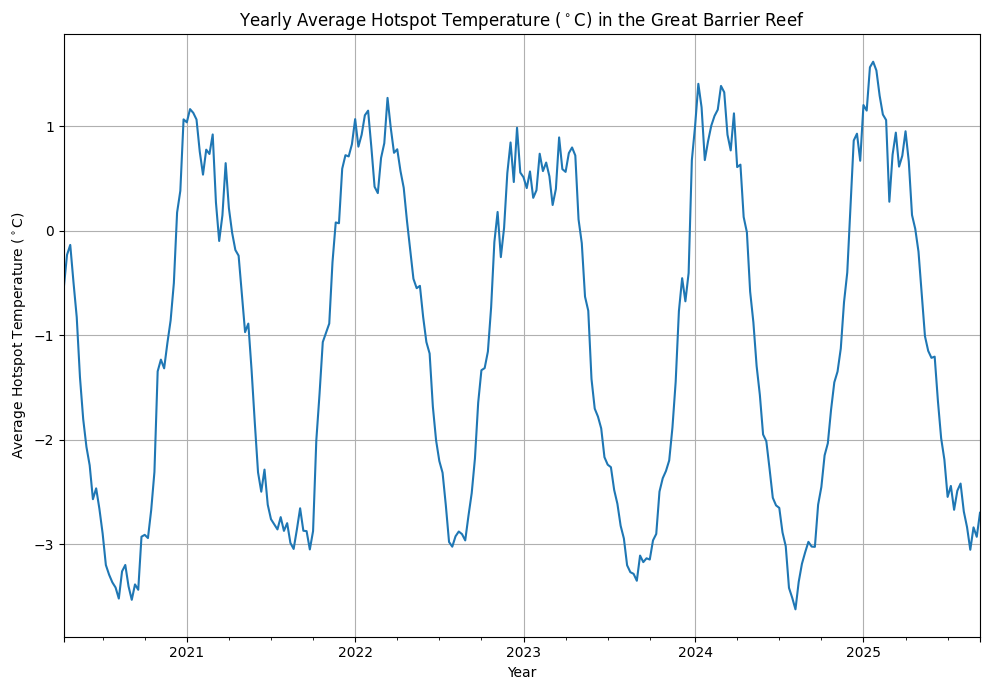

In [ ]:
# Calculate the data based on a weekly average
week_avg = df['hotspot (C)'].resample('W').mean()

# Create line graph
fig, x = plt.subplots(figsize=(10,7))
week_avg.plot(x=x, label='Northern Section')

# Set labels
plt.title('Yearly Average Hotspot Temperature ($^\\circ$C) in the Great Barrier Reef')
plt.xlabel('Year')
plt.ylabel('Average Hotspot Temperature ($^\\circ$C)')
plt.grid(True)
plt.tight_layout()

# Plot
plt.show()

## **7. Final Observations**
In hindsight based on everything that happened, I think it would've been better if I used a smaller data set; however, for this particular observation I couldn't do it any smaller than that of a weekly report otherwise the data set would be too small per location of the great barrier reef that it would be less than 53 points per area thus resulting in a potential blur of possible over simplification of average temperatures in the heat map and the temperature line graphs resulting in making all of them showing false positives of healthy temperature changes.

Though it was a very big waiting time, the loading period took nearly 40 minutes to 60 minutes for the data to load then another 5-10 minutes to clean the data. I was able to fix it after having to just open the file in the drive but in the end the scatterplot imaging from the heat map does still take 5 - 10 minutes. The data set, albeit really big, was interesting and worth researching more when I get more knowledgable about the topics regarding the heat interpretations. However, I hope next time when I work with similar data, I wish to work with a smaller dataset that is easier to load and doesn't cause such a long load time.